In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

interim_path = "../data/interim/"

In [2]:
df = pd.read_csv(interim_path+"sp500sub.csv", parse_dates=True)
df.head()

print(f"""Loading data and parsing by date, we get {df.shape[0]} observations (or dates), and {df.shape[1]} columns (or stocks).""")

df.head()

Loading data and parsing by date, we get 137879 observations (or dates), and 8 columns (or stocks).


,Date,Open,High,Low,Close,Adj Close,Volume,Name
0,2016-03-23,41.406097,41.406097,41.207508,41.207508,41.207508,201,UA
1,2016-03-24,40.581947,40.581947,40.581947,40.581947,40.581947,100,UA
2,2016-03-28,40.581947,40.581947,40.581947,40.581947,40.581947,0,UA
3,2016-03-29,40.581947,40.581947,40.581947,40.581947,40.581947,0,UA
4,2016-03-30,41.187649,41.703983,41.177719,41.703983,41.703983,3751,UA


In [3]:
df_sbux = df.loc[df["Name"]=="SBUX",:]
df_sbux.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Name
5434,2016-01-04,58.770000,58.830002,57.599998,58.259998,52.970352,13521500,SBUX
5435,2016-01-05,58.790001,58.790001,57.980000,58.650002,53.324947,9617800,SBUX
5436,2016-01-06,57.700001,58.529999,57.639999,58.130001,52.852169,8266300,SBUX
5437,2016-01-07,56.880001,57.910000,56.160000,56.689999,51.542908,11140900,SBUX
5438,2016-01-08,57.410000,57.730000,56.529999,56.630001,51.488361,10427000,SBUX


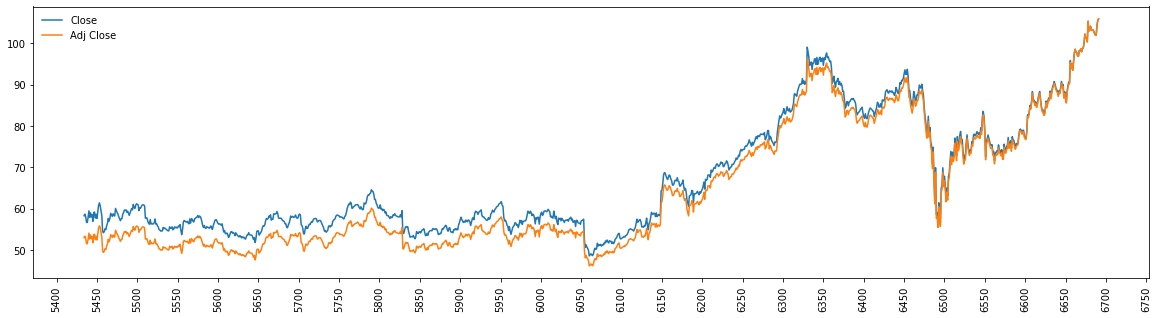

In [4]:
fig = plt.figure(figsize=(20, 5))
ax = fig.add_subplot(111)

for feature in ["Close", "Adj Close"]:
    ax.plot(df_sbux[feature], label=feature)

ax.xaxis.set_major_locator(plt.MaxNLocator(30))

ax.legend(loc='upper left', frameon=False)
plt.xticks(rotation=90)
plt.show();

## Adding a lag column 'prev_close' and the 'return' column

In [5]:
df_sbux['prev_close'] = df_sbux['Close'].shift(1)
df_sbux = df_sbux[['Date', 'Open', 'High', 'Low', 'Close', 'prev_close', 'Adj Close', 'Volume', 'Name']]
df_sbux.head()

,Date,Open,High,Low,Close,prev_close,Adj Close,Volume,Name
5434,2016-01-04,58.770000,58.830002,57.599998,58.259998,NaN,52.970352,13521500,SBUX
5435,2016-01-05,58.790001,58.790001,57.980000,58.650002,58.259998,53.324947,9617800,SBUX
5436,2016-01-06,57.700001,58.529999,57.639999,58.130001,58.650002,52.852169,8266300,SBUX
5437,2016-01-07,56.880001,57.910000,56.160000,56.689999,58.130001,51.542908,11140900,SBUX
5438,2016-01-08,57.410000,57.730000,56.529999,56.630001,56.689999,51.488361,10427000,SBUX


In [6]:
df_sbux['return'] = df_sbux['Close']/df_sbux['prev_close'] - 1
df_sbux = df_sbux[['Date', 'Open', 'High', 'Low', 'Close', 'prev_close', 'return', 'Adj Close', 'Volume', 'Name']]
df_sbux.head()

,Date,Open,High,Low,Close,prev_close,return,Adj Close,Volume,Name
5434,2016-01-04,58.770000,58.830002,57.599998,58.259998,NaN,NaN,52.970352,13521500,SBUX
5435,2016-01-05,58.790001,58.790001,57.980000,58.650002,58.259998,0.006694,53.324947,9617800,SBUX
5436,2016-01-06,57.700001,58.529999,57.639999,58.130001,58.650002,-0.008866,52.852169,8266300,SBUX
5437,2016-01-07,56.880001,57.910000,56.160000,56.689999,58.130001,-0.024772,51.542908,11140900,SBUX
5438,2016-01-08,57.410000,57.730000,56.529999,56.630001,56.689999,-0.001058,51.488361,10427000,SBUX


In [7]:
df_sbux['return2'] = df_sbux['Close'].pct_change(1)
df_sbux = df_sbux[['Date', 'Open', 'High', 'Low', 'Close', 'prev_close', 'return', 'return2', 'Adj Close', 'Volume', 'Name']]
df_sbux.head()

,Date,Open,High,Low,Close,prev_close,return,return2,Adj Close,Volume,Name
5434,2016-01-04,58.770000,58.830002,57.599998,58.259998,NaN,NaN,NaN,52.970352,13521500,SBUX
5435,2016-01-05,58.790001,58.790001,57.980000,58.650002,58.259998,0.006694,0.006694,53.324947,9617800,SBUX
5436,2016-01-06,57.700001,58.529999,57.639999,58.130001,58.650002,-0.008866,-0.008866,52.852169,8266300,SBUX
5437,2016-01-07,56.880001,57.910000,56.160000,56.689999,58.130001,-0.024772,-0.024772,51.542908,11140900,SBUX
5438,2016-01-08,57.410000,57.730000,56.529999,56.630001,56.689999,-0.001058,-0.001058,51.488361,10427000,SBUX


* return and return2 are equal.

Return from SBUX stock
Mean: 0.0
Standard deviation: 0.02



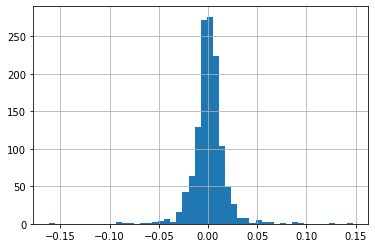

In [8]:
print(f"""Return from SBUX stock
Mean: {round(df_sbux['return'].mean(),2)}
Standard deviation: {round(df_sbux['return'].std(),2)}
""")

df_sbux['return'].hist(bins=50);

In [9]:
df_sbux['log_return'] = np.log(df_sbux['return']+1)
df_sbux = df_sbux[['Date', 'Open', 'High', 'Low', 'Close', 'prev_close', 'return', 'return2', 'log_return', 'Adj Close', 'Volume', 'Name']]
df_sbux.head()

,Date,Open,High,Low,Close,prev_close,return,return2,log_return,Adj Close,Volume,Name
5434,2016-01-04,58.770000,58.830002,57.599998,58.259998,NaN,NaN,NaN,NaN,52.970352,13521500,SBUX
5435,2016-01-05,58.790001,58.790001,57.980000,58.650002,58.259998,0.006694,0.006694,0.006672,53.324947,9617800,SBUX
5436,2016-01-06,57.700001,58.529999,57.639999,58.130001,58.650002,-0.008866,-0.008866,-0.008906,52.852169,8266300,SBUX
5437,2016-01-07,56.880001,57.910000,56.160000,56.689999,58.130001,-0.024772,-0.024772,-0.025084,51.542908,11140900,SBUX
5438,2016-01-08,57.410000,57.730000,56.529999,56.630001,56.689999,-0.001058,-0.001058,-0.001059,51.488361,10427000,SBUX


* 'log return' $\approx$ 'return'.

Return from SBUX stock
Mean: 0.0
Standard deviation: 0.02



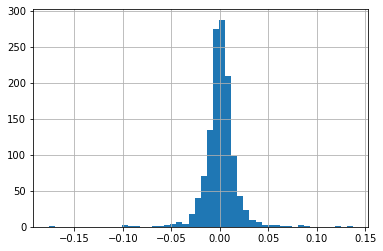

In [10]:
print(f"""Return from SBUX stock
Mean: {round(df_sbux['log_return'].mean(),2)}
Standard deviation: {round(df_sbux['log_return'].std(),2)}
""")

df_sbux['log_return'].hist(bins=50);

# QQ-plot (Quantile-Quantile Plot) or how to check ***normality***

Quantile is the inverse of the cumulated density function.

![QQ_plot](https://upload.wikimedia.org/wikipedia/commons/thumb/0/08/Normal_normal_qq.svg/300px-Normal_normal_qq.svg.png)

Image source: [Wikimedia](https://pt.wikipedia.org/wiki/Gr%C3%A1fico_Q-Q)

## QQ-plot patterns

![QQ_plot_patterns](../images/s02_qq_plot_patterns.png)


In [11]:
from scipy.stats import norm

In [12]:
x_list = np.linspace(df_sbux['return'].min(), df_sbux['return'].max(), 100)
x_list[:10]

array([-0.16204231, -0.15891761, -0.1557929 , -0.1526682 , -0.1495435 ,
       -0.1464188 , -0.14329409, -0.14016939, -0.13704469, -0.13391999])

In [13]:
y_list = norm.pdf(x_list, loc=df_sbux['return'].mean(), scale=df_sbux['return'].std())
y_list[:10]

array([5.42652656e-19, 3.03084318e-18, 1.63725219e-17, 8.55417777e-17,
       4.32266465e-16, 2.11268815e-15, 9.98687996e-15, 4.56598880e-14,
       2.01906562e-13, 8.63528363e-13])

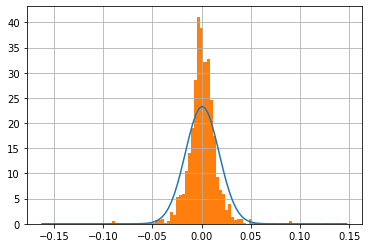

In [14]:
plt.plot(x_list, y_list)
df_sbux['return'].hist(bins=100, density=True);

In [15]:
from scipy.stats import probplot

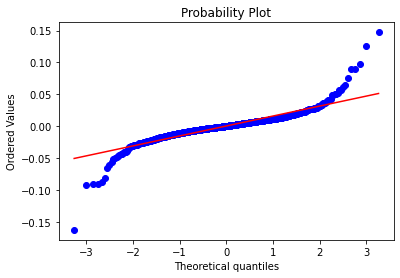

In [16]:
probplot(df_sbux['return'].dropna(), dist='norm', fit=True, plot=plt);

In [17]:
import statsmodels.api as sm

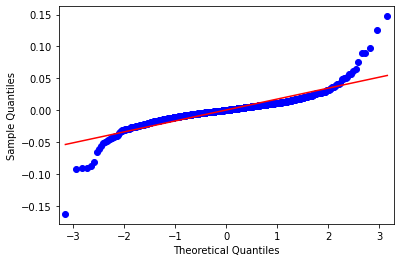

In [18]:
sm.qqplot(df_sbux['return'].dropna(), line='s');

# t-distribution

"When the distribution is not normal, what to do?"

In [19]:
from scipy.stats import t

x_list = np.linspace(df_sbux['return'].min(), df_sbux['return'].max(), 100)
x_list[:10]

array([-0.16204231, -0.15891761, -0.1557929 , -0.1526682 , -0.1495435 ,
       -0.1464188 , -0.14329409, -0.14016939, -0.13704469, -0.13391999])

In [20]:
params = t.fit(df_sbux['return'].dropna())
params

(2.6167968212691077, 0.0006994781640535497, 0.009059048722128947)

In [21]:
degrees_freedom, loc, scale = params

y_list = t.pdf(x_list, degrees_freedom, loc, scale)
y_list[:10]

array([0.00653731, 0.00700812, 0.007523  , 0.00808707, 0.00870614,
       0.00938686, 0.01013685, 0.01096486, 0.01188096, 0.01289679])

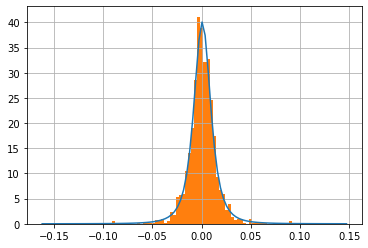

In [22]:
plt.plot(x_list, y_list)
df_sbux['return'].hist(bins=100, density=True);

* Using t-distribution fits better than normal distribution.

In [23]:
# REVIEW!!!

# probplot(df_sbux['return'].dropna(), df=degrees_freedom, dist='t', fit=True, plot=plt);

# Skewness and kurtosis

* **Mean** is the 1st moment;
* **Variance** is the 2nd moment;
* **Skewness** is the 3rd (standardized) moment;
* **Kurtosis** is the 4th (standardized) moment.

$ Skewness = E \left[  \left( \frac{X-\mu}{\sigma} \right)^3 \right]$

$ Kurtosis = E \left[  \left( \frac{X-\mu}{\sigma} \right)^4 \right]$

## Skewness

![Skewness](../images/s02_skewness.png)

## Kurtosis

* Normal distribution has kutosis = 3. Therefore, excess of kurtosis is  kurtosis > 3.
* High kurtosis means more potential returns (and risks).

# Confidence intervals

For a 95% confidence interval, we have:

$$ \bar{X} - 1.96 \frac{\sigma}{\sqrt{N}} \leq \mu \leq \bar{X} + 1.96 \frac{\sigma}{\sqrt{N}}$$

![Confidence intervals](../images/s02_confidence_interval.png)